In [1]:
import pandas as pd
import numpy as np
import os
import h5py
from copy import deepcopy
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
plt.style.use('paper.mplstyle')
import seaborn as sns

from utils_plot import *

cm = 1/2.54 
h=5.8*1.1
w=6*1.1

resp_res_path = '/cluster/work/grlab/clinical/hirid2/research/event_based_analysis/resp/'
renal_res_path = '/cluster/work/grlab/clinical/hirid2/research/kdigo_analysis/'
resp_fig_path = '../Figures_Resp'
renal_fig_path = 'paper_figures_renal'

In [2]:
# early warning system configuration
renal_ews_configs = dict()
renal_ews_configs.update(pred_win=2880)
renal_ews_configs.update(min_event_gap=0)
renal_ews_configs.update(t_silence=480)
renal_ews_configs.update(t_buffer=0)
renal_ews_configs.update(t_reset=720)

splits = ['temporal_%d'%i for i in np.arange(1,6)]


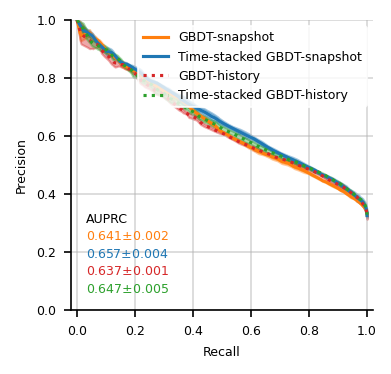

In [6]:
curves = dict()
curves.update({"GBDT-snapshot": dict(res_path=os.path.join(renal_res_path, 'var28_simple_features_lgbm_recompute_test_FromZero'),
                                             color='C1',
                                             linestyle='-',
                                             random_classifier=False,
                                             splits=splits)})

curves.update({"Time-stacked GBDT-snapshot": dict(res_path=os.path.join(renal_res_path, 'var28_simple_features_separate_combined_calibrated_lgbm_test_FromZero'),
                                             color='C0',
                                             linestyle='-',
                                             random_classifier=False,
                                             splits=splits)})

curves.update({"GBDT-history": dict(res_path=os.path.join(renal_res_path, 'var28_complex_features_lgbm_recompute_test_FromZero'),
                                             color='C3',
                                             linestyle=':',
                                             random_classifier=False,
                                             splits=splits)})

curves.update({"Time-stacked GBDT-history": dict(res_path=os.path.join(renal_res_path, 'var28_complex_features_separate_combined_calibrated_lgbm_test_FromZero'),
                                             color='C2',
                                             linestyle=':',
                                             random_classifier=False,
                                             splits=splits)})


for k in curves.keys():
    curves[k].update(dict(**renal_ews_configs))    
    
plt.figure(figsize=(w*cm, h*cm))
plot_event_based_prc(curves, fixed_rec=1.0)
plt.savefig(os.path.join(renal_fig_path,'joint_vs_separate'))
plt.show()  

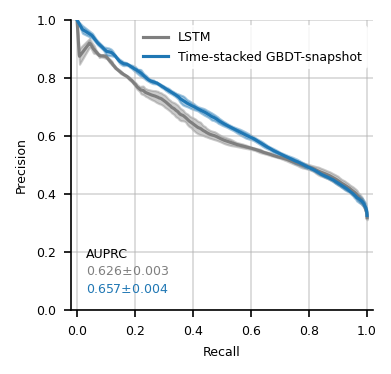

In [4]:
curves = dict()
curves.update({"LSTM": dict(res_path=os.path.join(renal_res_path, 'var28_lstm_test_FromZero'),
                                             color='C7',
                                             linestyle='-',
                                             random_classifier=False,
                                             splits=splits)})

curves.update({"Time-stacked GBDT-snapshot": dict(res_path=os.path.join(renal_res_path, 'var28_simple_features_separate_combined_calibrated_lgbm_test_FromZero'),
                                             color='C0',
                                             linestyle='-',
                                             random_classifier=False,
                                             splits=splits)})


for k in curves.keys():
    curves[k].update(dict(**renal_ews_configs))    
    
plt.figure(figsize=(w*cm, h*cm))
plot_event_based_prc(curves, fixed_rec=1.0)
plt.savefig(os.path.join(renal_fig_path,'gbdt_lstm'))
plt.show()  